In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [5]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fire/CDI_Based/Entropy/CSV/Optical.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-5-b5eb005d8dae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-5-b5eb005d8dae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,Class
0,6.499106,6.325922,6.138347,6.677098,5.944888,6.135309,5.899482,5.801084,5.686725,6.246203,...,6.059478,5.747850,1.405984,1.393946,2.383877,2.110883,1.176388,1.129626,0.985198,1
1,5.788572,5.847180,5.840763,6.160900,5.959625,5.785196,5.940321,5.734212,5.883041,6.028095,...,0.579659,0.803102,0.836626,0.965238,0.776770,0.853798,0.852924,0.680608,0.649927,1
2,5.905923,5.733370,6.452061,6.955895,5.800455,5.792337,6.677264,6.828788,6.397752,7.122845,...,5.044868,6.113437,5.927205,5.399750,6.025731,5.511242,5.015948,6.860445,6.913186,1
3,2.333854,1.995163,1.695817,1.802002,2.138103,2.145863,2.295416,1.960960,2.126046,2.692577,...,0.000000,0.000000,0.000000,0.277537,1.754851,1.956068,1.118516,0.301777,0.298088,1
4,2.669090,2.708604,2.607685,2.533135,2.606556,2.786949,2.481611,2.652672,2.401634,2.164324,...,3.405750,3.384927,3.121218,3.297320,2.497086,1.996286,1.955148,1.929200,2.084374,1


In [6]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

In [7]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.7083333333333334
              precision    recall  f1-score   support

          -1       0.87      0.77      0.82       142
           1       0.22      0.35      0.27        26

    accuracy                           0.71       168
   macro avg       0.54      0.56      0.54       168
weighted avg       0.77      0.71      0.73       168



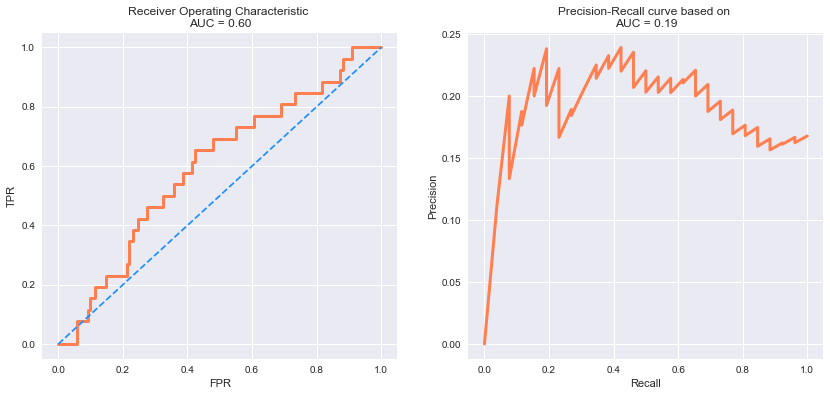

In [8]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()